# Risk Analysis of the Space Shuttle: Pre-Challenger Prediction of Failure

In this document we reperform some of the analysis provided in 
*Risk Analysis of the Space Shuttle: Pre-Challenger Prediction of Failure* by *Siddhartha R. Dalal, Edward B. Fowlkes, Bruce Hoadley* published in *Journal of the American Statistical Association*, Vol. 84, No. 408 (Dec., 1989), pp. 945-957 and available at http://www.jstor.org/stable/2290069. 

On the fourth page of this article, they indicate that the maximum likelihood estimates of the logistic regression using only temperature are: $\hat{\alpha}=5.085$ and $\hat{\beta}=-0.1156$ and their asymptotic standard errors are $s_{\hat{\alpha}}=3.052$ and $s_{\hat{\beta}}=0.047$. The Goodness of fit indicated for this model was $G^2=18.086$ with 21 degrees of freedom. Our goal is to reproduce the computation behind these values and the Figure 4 of this article, possibly in a nicer looking way.

## Technical information on the computer on which the analysis is run

We will be using the python3 language using the pandas, statsmodels, numpy, matplotlib and seaborn libraries.

In [1]:
#!pip install statsmodels 
#!pip install seaborn

In [2]:
def print_imported_modules():
    import sys
    for name, val in sorted(sys.modules.items()):
        if(hasattr(val, '__version__')): 
            print(val.__name__, val.__version__)
#        else:
#            print(val.__name__, "(unknown version)")
def print_sys_info():
    import sys
    import platform
    print(sys.version)
    print(platform.uname())

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

print_sys_info()
print_imported_modules()

3.6.4 |Anaconda, Inc.| (default, Mar 13 2018, 01:15:57) 
[GCC 7.2.0]
uname_result(system='Linux', node='H2-SCHMIDER', release='5.3.0-46-generic', version='#38~18.04.1-Ubuntu SMP Tue Mar 31 04:17:56 UTC 2020', machine='x86_64', processor='x86_64')
IPython 7.13.0
IPython.core.release 7.13.0
_csv 1.0
_ctypes 1.1.0
_curses b'2.2'
decimal 1.70
argparse 1.1
backcall 0.1.0
csv 1.0
ctypes 1.1.0
cycler 0.10.0
dateutil 2.8.1
decimal 1.70
decorator 4.4.2
distutils 3.6.4
ipaddress 1.0
ipykernel 5.1.4
ipykernel._version 5.1.4
ipython_genutils 0.2.0
ipython_genutils._version 0.2.0
ipywidgets 7.5.1
ipywidgets._version 7.5.1
jedi 0.16.0
json 2.0.9
jupyter_client 6.1.2
jupyter_client._version 6.1.2
jupyter_core 4.6.3
jupyter_core.version 4.6.3
kiwisolver 1.1.0
logging 0.5.1.2
matplotlib 3.1.3
matplotlib.backends.backend_agg 3.1.3
mkl 2.3.0
numpy 1.18.1
numpy.core 1.18.1
numpy.core._multiarray_umath 3.1
numpy.lib 1.18.1
numpy.linalg._umath_linalg b'0.1.5'
numpy.matlib 1.18.1
optparse 1.5.3
pandas 0.22.0

## Loading and inspecting data
Let's start by reading data.

In [3]:
#data = pd.read_csv("https://app-learninglab.inria.fr/moocrr/gitlab/moocrr-session3/moocrr-reproducibility-study/blob/master/data/shuttle.csv")
data_url ='https://app-learninglab.inria.fr/moocrr/gitlab/moocrr-session3/moocrr-reproducibility-study/raw/7e01583b99527ad27cbeae0f9d2085fe8f2f1d15/data/shuttle.csv?inline=false'
data_file='/home/aschmide/Documents/formation_MOOC_RR/mooc-rr/module4/shuttle.csv'
import os
import urllib.request

if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)
    
data = pd.read_csv(data_file)

import time
modtime=os.path.getmtime(data_file)
modtime=time.ctime(modtime)
print('file downloaded on',modtime)
data

file downloaded on Tue Apr 14 10:06:35 2020


Date  Count  Temperature  Pressure  Malfunction
0     4/12/81      6           66        50            0
1    11/12/81      6           70        50            1
2     3/22/82      6           69        50            0
3    11/11/82      6           68        50            0
4     4/04/83      6           67        50            0
5     6/18/82      6           72        50            0
6     8/30/83      6           73       100            0
7    11/28/83      6           70       100            0
8     2/03/84      6           57       200            1
9     4/06/84      6           63       200            1
10    8/30/84      6           70       200            1
11   10/05/84      6           78       200            0
12   11/08/84      6           67       200            0
13    1/24/85      6           53       200            2
14    4/12/85      6           67       200            0
15    4/29/85      6           75       200            0
16    6/17/85      6           70       200            0
17  7/2903/85      6           81       200            0
18    8/27/85      6           76       200            0
19   10/03/85      6           79       200            0
20   10/30/85      6           75       200            2
21   11/26/85      6           76       200            0
22    1/12/86      6           58       200            1

We know from our previous experience on this data set that filtering data is a really bad idea. We will therefore process it as such.

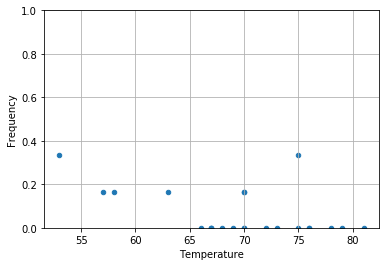

In [4]:
%matplotlib inline
pd.set_option('mode.chained_assignment',None) # this removes a useless warning from pandas
import matplotlib.pyplot as plt

data["Frequency"]=data.Malfunction/data.Count
data.plot(x="Temperature",y="Frequency",kind="scatter",ylim=[0,1])
plt.grid(True)

## Logistic regression

Let's assume O-rings independently fail with the same probability which solely depends on temperature. A logistic regression should allow us to estimate the influence of temperature.

In [5]:
import statsmodels.api as sm

data["Success"]=data.Count-data.Malfunction
data["Intercept"]=1

logmodel=sm.GLM(data['Frequency'], data[['Intercept','Temperature']], 
                family=sm.families.Binomial(sm.families.links.logit)).fit()

logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Frequency   No. Observations:                   23
Model:                            GLM   Df Residuals:                       21
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3.9210
Date:                Wed, 15 Apr 2020   Deviance:                       3.0144
Time:                        15:20:47   Pearson chi2:                     5.00
No. Iterations:                     6   Covariance Type:             nonrobust
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.0850      7.477      0.680      0.496      -9.570      19.740
Temperature    -0.1156      0.115     -1.004      0.316      -0.341       0.110
===============================================================================
"""

The maximum likelyhood estimator of the intercept and of Temperature are thus $\hat{\alpha}=5.0849$ and $\hat{\beta}=-0.1156$. This **corresponds** to the values from the article of Dalal *et al.* The standard errors are $s_{\hat{\alpha}} = 7.477$ and $s_{\hat{\beta}} = 0.115$, which is **different** from the $3.052$ and $0.04702$ reported by Dallal *et al.* The deviance is $3.01444$ with 21 degrees of freedom. I cannot find any value similar to the Goodness of fit ($G^2=18.086$) reported by Dalal *et al.* There seems to be something wrong. Oh I know, I haven't indicated that my observations are actually the result of 6 observations for each rocket launch. Let's indicate these weights (since the weights are always the same throughout all experiments, it does not change the estimates of the fit but it does influence the variance estimates).

In [6]:
logmodel=sm.GLM(data['Frequency'], data[['Intercept','Temperature']], 
                family=sm.families.Binomial(sm.families.links.logit),
                var_weights=data['Count']).fit()

logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Frequency   No. Observations:                   23
Model:                            GLM   Df Residuals:                       21
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23.526
Date:                Wed, 15 Apr 2020   Deviance:                       18.086
Time:                        15:21:05   Pearson chi2:                     30.0
No. Iterations:                     6   Covariance Type:             nonrobust
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.0850      3.052      1.666      0.096      -0.898      11.068
Temperature    -0.1156      0.047     -2.458      0.014      -0.208      -0.023
===============================================================================
"""

Good, now I have recovered the asymptotic standard errors $s_{\hat{\alpha}}=3.052$ and $s_{\hat{\beta}}=0.047$.
The Goodness of fit (Deviance) indicated for this model is $G^2=18.086$ with 21 degrees of freedom (Df Residuals).

**I have therefore managed to fully replicate the results of the Dalal *et al.* article**.

## Predicting failure probability
The temperature when launching the shuttle was 31°F. Let's try to estimate the failure probability for such temperature using our model.:

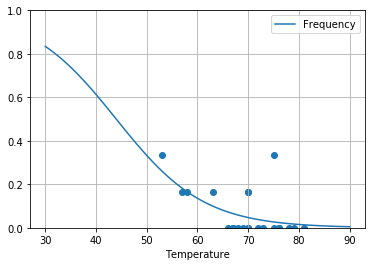

In [7]:
%matplotlib inline
data_pred = pd.DataFrame({'Temperature': np.linspace(start=30, stop=90, num=121), 'Intercept': 1})
data_pred['Frequency'] = logmodel.predict(data_pred)
data_pred.plot(x="Temperature",y="Frequency",kind="line",ylim=[0,1])
plt.scatter(x=data["Temperature"],y=data["Frequency"])
plt.grid(True)

The predictiction is not correct. Let's see what went wrong

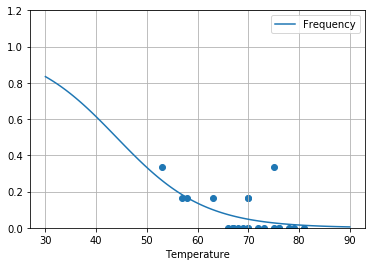

In [8]:
data_pred.plot(x="Temperature",y="Frequency",kind="line",ylim=[0,1.2])
plt.scatter(x=data["Temperature"],y=data["Frequency"])
plt.grid(True)

This figure is very similar to the Figure 4 of Dalal *et al.* **I have managed to replicate the Figure 4 of the Dalal *et al.* article.**

## Computing and plotting uncertainty

Following the documentation of [Seaborn](https://seaborn.pydata.org/generated/seaborn.regplot.html), I use regplot.

/home/aschmide/miniconda3/envs/envStats9/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


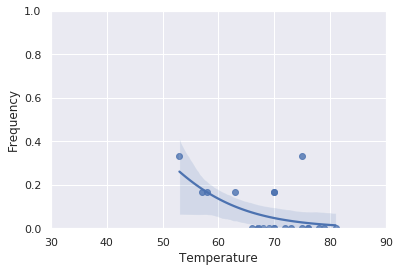

In [9]:
sns.set(color_codes=True)
plt.xlim(30,90)
plt.ylim(0,1)
sns.regplot(x='Temperature', y='Frequency', data=data, logistic=True)
plt.show()

**I think I have managed to correctly compute and plot the uncertainty of my prediction.** Although the shaded area seems very similar to [the one obtained by with R](https://app-learninglab.inria.fr/moocrr/gitlab/moocrr-session3/moocrr-reproducibility-study/tree/master/challenger.pdf), I can spot a few differences (e.g., the blue point for temperature 63 is outside)... Could this be a numerical error ? Or a difference in the statistical method ? It is not clear which one is "right".

In [10]:
data_pred

Intercept  Temperature  Frequency
0            1         30.0   0.834373
1            1         30.5   0.826230
2            1         31.0   0.817774
3            1         31.5   0.809002
4            1         32.0   0.799911
5            1         32.5   0.790500
6            1         33.0   0.780766
7            1         33.5   0.770712
8            1         34.0   0.760339
9            1         34.5   0.749648
10           1         35.0   0.738645
11           1         35.5   0.727334
12           1         36.0   0.715721
13           1         36.5   0.703816
14           1         37.0   0.691626
15           1         37.5   0.679164
16           1         38.0   0.666441
17           1         38.5   0.653471
18           1         39.0   0.640269
19           1         39.5   0.626851
20           1         40.0   0.613235
21           1         40.5   0.599439
22           1         41.0   0.585485
23           1         41.5   0.571391
24           1         42.0   0.557181
25           1         42.5   0.542876
26           1         43.0   0.528501
27           1         43.5   0.514078
28           1         44.0   0.499631
29           1         44.5   0.485186
..         ...          ...        ...
91           1         75.5   0.025508
92           1         76.0   0.024110
93           1         76.5   0.022787
94           1         77.0   0.021535
95           1         77.5   0.020350
96           1         78.0   0.019229
97           1         78.5   0.018169
98           1         79.0   0.017166
99           1         79.5   0.016217
100          1         80.0   0.015321
101          1         80.5   0.014473
102          1         81.0   0.013671
103          1         81.5   0.012913
104          1         82.0   0.012197
105          1         82.5   0.011520
106          1         83.0   0.010880
107          1         83.5   0.010275
108          1         84.0   0.009703
109          1         84.5   0.009163
110          1         85.0   0.008653
111          1         85.5   0.008171
112          1         86.0   0.007716
113          1         86.5   0.007286
114          1         87.0   0.006879
115          1         87.5   0.006496
116          1         88.0   0.006133
117          1         88.5   0.005791
118          1         89.0   0.005467
119          1         89.5   0.005162
120          1         90.0   0.004873

[121 rows x 3 columns]

In [11]:
data_pred = pd.DataFrame({'Temperature': np.linspace(start=30, stop=90, num=121), 'Intercept': 1})
logmodel.predict(data_pred)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
116    1.0
117    1.0
118    1.0
119    1.0
120    1.0
Length: 121, dtype: float64